## Continuous Variable Feature Engineering

In [1]:
# Required Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [41]:
# Dataset import

data = pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv")

In [42]:
# Dataset copy

df = data

In [17]:
# Datset explore

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [44]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [190]:
# Percentage of missing values

print(f"The % of missing values in Age column is: {round(17700/891, 2)}")
print(f"The % of missing values in Cabin column is: {round(68700/891, 2)}")
print(f"The % of missing values in Embarked column is: {round(200/891, 2)}")

The % of missing values in Age column is: 19.87
The % of missing values in Cabin column is: 77.1
The % of missing values in Embarked column is: 0.22


In [ ]:
# Missing values treatments:

In [191]:
## 1. Removal of the complete index if the missing values are less in number (Embarked)

df[df['Embarked'].isnull()].index.tolist()

[61, 829]

In [18]:
df.drop([61], axis =0, inplace = True)
df.drop([829], axis =0, inplace = True)

In [69]:
## 2. Central Tendency imputation (Age)

In [43]:
# Direct imputation
df['Age'].fillna(df.Age.median(),inplace=True)

In [193]:
#Imputation after creating a new column. 
def impute_nan_median(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [194]:
median=df.Age.median()
median

28.0

In [195]:
impute_nan_median(df,'Age',median)

In [196]:
# To check the impact in standard deviation after the imputation
print(df['Age'].std())
print(df['Age_median'].std())

14.49293290032352
12.984932293690774


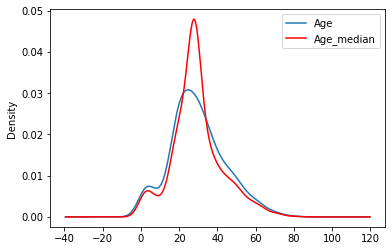

In [197]:
# Graphical plotting of the std difference 
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax)
df.Age_median.plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [75]:
## 3. Random sample imputation (Age)

In [198]:
def impute_nan_rand(df,variable):
    df[variable+"_random"]=df[variable]
    ##It will have the random sample to fill the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    ##pandas need to have same index in order to merge the dataset
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [199]:
impute_nan_rand(df,"Age")

In [200]:
# To check the impact in standard deviation after the imputation
print(df['Age'].std())
print(df['Age_random'].std())

14.49293290032352
14.661431791672749


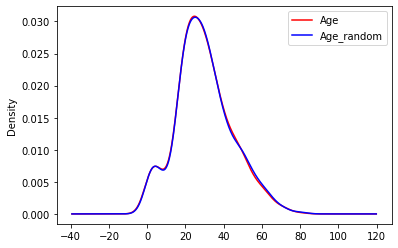

In [201]:
# Graphical plotting of the std difference.
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde', ax=ax, color ="red")
df.Age_random.plot(kind='kde', ax=ax, color='blue')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

In [180]:
## 4. Impuation with a specific value (Cabin)

In [202]:
df.Cabin.mode()

0        B96 B98
1    C23 C25 C27
2             G6
dtype: object

In [203]:
def impute_nan_mode(df,variable,mode):
    df[variable+"_mode"]=df[variable].fillna(mode)

In [204]:
mode = "G6"
impute_nan_mode(df, "Cabin", mode)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          712 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Cabin        202 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_median   889 non-null    float64
 13  Age_random   889 non-null    float64
 14  Cabin_mode   889 non-null    object 
dtypes: float64(4), int64(5), object(6)
memory usage: 111.1+ KB


## Categorical Variable Feature Engineering

In [4]:
# One hot encoding

In [25]:
df_sex=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Sex'])

In [28]:
df_sex.Sex.unique()

array(['male', 'female'], dtype=object)

In [15]:
pd.get_dummies(df_sex,drop_first=True).head()

,Sex_male
0,1
1,0
2,0
3,0
4,1


In [34]:
df_embarked=pd.read_csv("https://raw.githubusercontent.com/krishnaik06/Feature-Engineering-Live-sessions/master/titanic.csv",usecols=['Embarked'])

In [20]:
pd.get_dummies(df_embarked, drop_first = True).head()

,Embarked_Q,Embarked_S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1
